In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os as os


In [15]:
# Load your dataset
dataset_path = r'C:\Users\ASUS\Desktop\FRAUDLENS\Dataset'  # Replace with your actual path
# Assuming your dataset file is a CSV
data = pd.read_csv(os.path.join(dataset_path, 'creditcard.csv'))

In [2]:

# Explore the dataset
print(data.head())
print(data.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(data.tail())

            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  

In [4]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
# un-palanced dataset
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


# PreProccessing

In [6]:
fraud = data[data['Class'] == 1]
not_fraud = data[data['Class'] == 0]

print("Fraudulent Transactions:")
print(fraud.head())  # Display first few fraudulent transactions
print("\nNon-Fraudulent Transactions:")
print(not_fraud.head())  # Display first few non-fraudulent transactions


Fraudulent Transactions:
        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0

In [7]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
not_fraud=not_fraud.sample(n=492)
not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165241,117301.0,2.022383,-0.135285,-0.724326,0.887513,0.197211,0.559966,-0.554171,0.122507,0.617523,...,0.192630,0.737078,-0.048643,-1.379452,0.092922,-0.498515,0.057726,-0.052943,1.00,0
186568,127160.0,-0.134144,1.180637,-0.596838,-0.630778,1.078995,-0.720223,1.047940,-0.155524,-0.008149,...,-0.370835,-0.808630,0.089787,0.396923,-0.296663,0.126546,0.333303,0.159041,17.99,0
687,518.0,-0.641320,0.738098,1.916436,-0.162040,0.371740,-0.203711,0.734552,-0.106378,-0.650380,...,-0.098913,-0.232043,-0.011842,0.214894,-0.486273,0.004232,-0.226933,-0.092456,9.99,0
113701,73171.0,1.367950,-0.591588,0.168180,-0.572984,-1.035432,-0.934982,-0.481263,-0.070972,-0.785585,...,0.196520,0.508529,-0.131773,0.542968,0.676559,-0.089498,-0.023256,-0.007846,10.00,0
101592,67887.0,-0.883117,-0.050789,3.045154,-1.374445,-1.411053,0.174284,-0.712516,0.324179,0.218138,...,0.157125,0.783665,-0.410037,0.436226,0.537830,-0.125032,0.210181,0.128199,1.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,7046.0,1.082317,0.278424,0.532758,0.942312,-0.369090,-1.217887,0.395276,-0.456094,0.940309,...,-0.559658,-1.557624,0.220738,0.646267,0.043783,-0.201425,-0.076834,0.033209,89.95,0
118081,74943.0,1.051816,-0.585844,1.568940,1.104622,-1.369629,0.562016,-1.033888,0.418805,1.502327,...,-0.156616,-0.079221,-0.038836,0.379990,0.326915,0.370555,0.032779,0.017383,28.61,0
8477,11357.0,-0.872882,0.880470,2.213435,-1.216853,0.287125,-0.337387,0.662548,-0.320847,0.939137,...,-0.216698,-0.386504,-0.318667,-0.003705,0.076236,0.738860,-0.508286,-0.190278,8.85,0
129486,79106.0,1.157271,0.780195,0.247616,2.505982,0.319933,-0.538231,0.572636,-0.227297,-1.241383,...,0.048302,0.197007,-0.050497,0.428081,0.647920,0.074346,-0.016498,0.012789,6.45,0


In [10]:
# Normalize the dataset
palanced_dataset=pd.concat([fraud,not_fraud],axis=0)
palanced_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,7046.0,1.082317,0.278424,0.532758,0.942312,-0.369090,-1.217887,0.395276,-0.456094,0.940309,...,-0.559658,-1.557624,0.220738,0.646267,0.043783,-0.201425,-0.076834,0.033209,89.95,0
118081,74943.0,1.051816,-0.585844,1.568940,1.104622,-1.369629,0.562016,-1.033888,0.418805,1.502327,...,-0.156616,-0.079221,-0.038836,0.379990,0.326915,0.370555,0.032779,0.017383,28.61,0
8477,11357.0,-0.872882,0.880470,2.213435,-1.216853,0.287125,-0.337387,0.662548,-0.320847,0.939137,...,-0.216698,-0.386504,-0.318667,-0.003705,0.076236,0.738860,-0.508286,-0.190278,8.85,0
129486,79106.0,1.157271,0.780195,0.247616,2.505982,0.319933,-0.538231,0.572636,-0.227297,-1.241383,...,0.048302,0.197007,-0.050497,0.428081,0.647920,0.074346,-0.016498,0.012789,6.45,0


In [11]:
palanced_dataset["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

# Splitting the Data

In [12]:
x=palanced_dataset.drop("Class",axis='columns')
y=palanced_dataset["Class"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

# Build Logistic Regression Model

In [16]:
logs_model=LogisticRegression()
logs_model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_predict=logs_model.predict(x_test)

In [19]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [18]:

y_pred_svm = svm_model.predict(x_test)

# Evaluate The Model


Evaluation for Logistic Regression:
Logistic Regression Accuracy: 0.9238578680203046
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix for Logistic Regression:
[[96  3]
 [12 86]]

Evaluation for SVM:
SVM Accuracy: 0.8934010152284264
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        99
           1       0.98      0.81      0.88        98

    accuracy                           0.89       197
   macro avg       0.91      0.89      0.89       197
weighted avg       0.91      0.89      0.89       197

Confusion Matrix for SVM:
[[97  2]
 [19 79]]


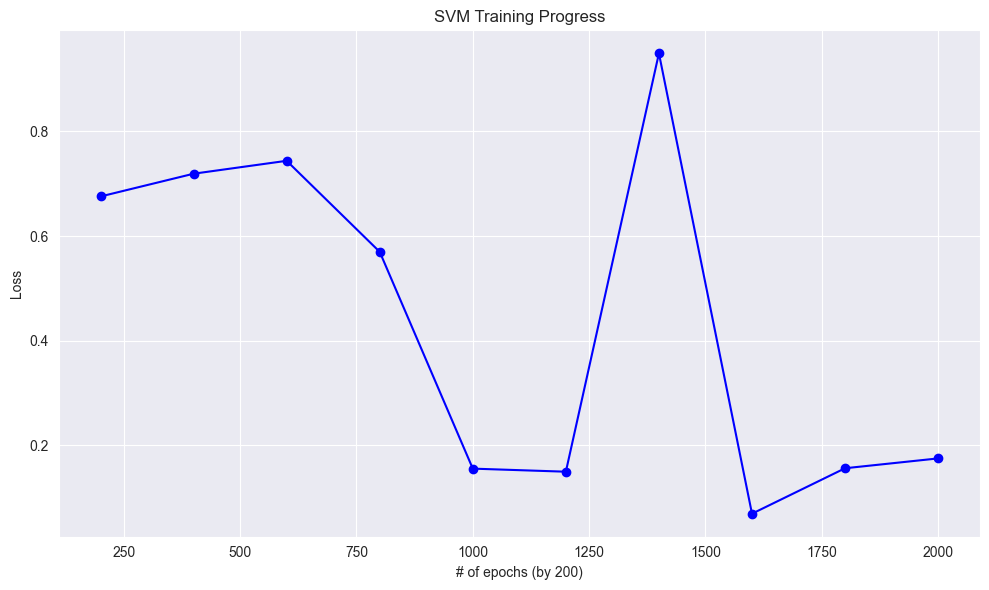

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix for {model_name}:')
    print(confusion_matrix(y_true, y_pred))

# Assuming y_test, y_pred_logistic, and y_pred_svm are defined from your previous model evaluations

# Evaluate Logistic Regression model
print("\nEvaluation for Logistic Regression:")
evaluate_model(y_test, y_predict, 'Logistic Regression')

# Evaluate SVM model
print("\nEvaluation for SVM:")
evaluate_model(y_test, y_pred_svm, 'SVM')

# Visualize SVM training progress (example plot)
# Assuming you have 'losses' from your training process
losses = np.random.rand(10)  # Example random data for losses
epochs = np.arange(1, len(losses) + 1) * 200  # Assuming each epoch is by 200

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('SVM Training Progress')
plt.xlabel('# of epochs (by 200)')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()
